In [ ]:
import tensorflow as tf
import numpy as np
import os
import distutils
#if distutils.version.LooseVersion(tf.__version__) <= '2.0':
#    raise Exception('This notebook is compatible with TensorFlow 1.14 or higher, for TensorFlow 1.13 or lower please use the previous version at https://github.com/tensorflow/tpu/blob/r1.13/tools/colab/fashion_mnist.ipynb')

#(x_train, y_train), (x_test, y_test) = tf.keras.datasets.mnist.load_data()
(x_train, y_train), (x_test, y_test) = tf.keras.datasets.fashion_mnist.load_data()
print(x_train.shape)
# add empty color dimension
x_train = np.expand_dims(x_train, -1)/255
x_test = np.expand_dims(x_test, -1)/255
# Convert y to one-hot
y_train = tf.keras.utils.to_categorical(y_train, 10)
y_test = tf.keras.utils.to_categorical(y_test, 10)

(60000, 28, 28)


In [61]:
import tensorflow as tf
from tensorflow.keras.layers import *
from keras.models import Model
from keras.optimizers import Adam, SGD
import numpy as np
import matplotlib.pyplot as plt
import os
import distutils
from keras.layers import Dropout

def create_model():
  model = tf.keras.models.Sequential()
  model.add(tf.keras.layers.Conv2D(32, (3, 3), input_shape=(28,28,1), activation='relu'))
  model.add(BatchNormalization())
  model.add(tf.keras.layers.MaxPooling2D(pool_size=(2, 2)))
  model.add(tf.keras.layers.Conv2D(64, (3, 3), activation='relu'))
  model.add(BatchNormalization())
  model.add(tf.keras.layers.MaxPooling2D(pool_size=(2, 2),padding='same'))
  model.add(BatchNormalization())
  model.add(tf.keras.layers.Flatten())
  model.add(tf.keras.layers.Dense(64,activation ='relu'))
  model.add(Dropout(0.5))
  model.add(tf.keras.layers.Dense(10,activation = 'softmax'))
  return model

In [63]:
model = create_model()
model.summary()

model.compile(loss="categorical_crossentropy", optimizer="Adam", metrics=["accuracy"])

history = model.fit(x_train, y_train, batch_size=98, epochs=10, validation_data=(x_test, y_test))

Model: "sequential_29"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_56 (Conv2D)           (None, 26, 26, 32)        320       
_________________________________________________________________
batch_normalization_57 (Batc (None, 26, 26, 32)        128       
_________________________________________________________________
max_pooling2d_54 (MaxPooling (None, 13, 13, 32)        0         
_________________________________________________________________
conv2d_57 (Conv2D)           (None, 11, 11, 64)        18496     
_________________________________________________________________
batch_normalization_58 (Batc (None, 11, 11, 64)        256       
_________________________________________________________________
max_pooling2d_55 (MaxPooling (None, 6, 6, 64)          0         
_________________________________________________________________
batch_normalization_59 (Batc (None, 6, 6, 64)        

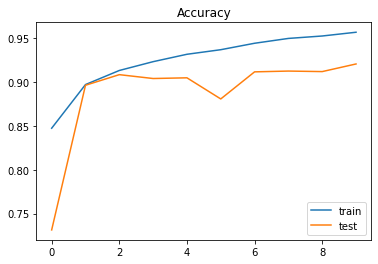

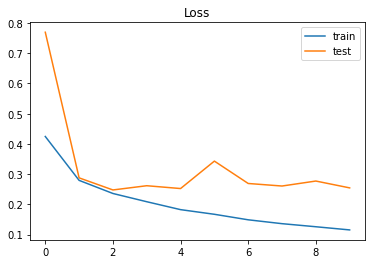

In [26]:
fig, ax = plt.subplots()
ax.plot(history.history['accuracy'],label = 'train')
ax.plot(history.history['val_accuracy'],label = 'test')
ax.set_title('Accuracy')
ax.legend(loc='lower right')
fig, ax = plt.subplots()
ax.plot(history.history['loss'],label = 'train')
ax.plot(history.history['val_loss'],label = 'test')
ax.set_title('Loss')
ax.legend(loc='upper right')